In [1]:
# ...........Importing............
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
# https://www.kaggle.com/datasets/debashis74017/nifty-50-minute-data?select=NIFTY+IT_daily_data.csv

# .......Preprocessing..............
df= pd.read_csv('./it/it.csv')
df=df.dropna()
df=df.drop_duplicates()
df.head()

,date,open,high,low,close,volume
0,2015-01-01 09:15:00,11214.80,11235.75,11166.35,11215.70,0
1,2015-01-02 09:15:00,11214.65,11399.10,11214.65,11372.10,0
2,2015-01-05 09:15:00,11369.35,11433.75,11186.95,11248.55,0
3,2015-01-06 09:15:00,11186.10,11186.10,10909.00,10959.90,0
4,2015-01-07 09:15:00,11013.20,11042.35,10889.55,10916.00,0


In [3]:
# .............Selecting Features..............
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

# Features
X = df[["open", "high", "low", "year", "month", "day"]]

# Target
y = df["close"]

In [4]:
#.................Splitting the dataset..............
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
#............Printing Info...............
print("Train samples:",len(X_train),"|","Test samples:",len(X_test))

Train samples: 1757 | Test samples: 753


In [6]:
# .............Train model..............
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
#...........Loading model from disk.............
joblib.dump(model, "model.pkl")
model = joblib.load("model.pkl")

In [8]:
#...............Simple Model..............
joblib.dump({'coef': model.coef_, 'intercept': model.intercept_}, 'simplemodel.pkl')

['simplemodel.pkl']

In [57]:
# ...........Predicting..............
predictions = model.predict(X_test)

In [58]:
# .............Accuracy check...............
r2 = r2_score(y_test , predictions)
accuracy = r2 * 100
print(f"Model Accuracy: {accuracy}%")

Model Accuracy: 99.99008464438649%


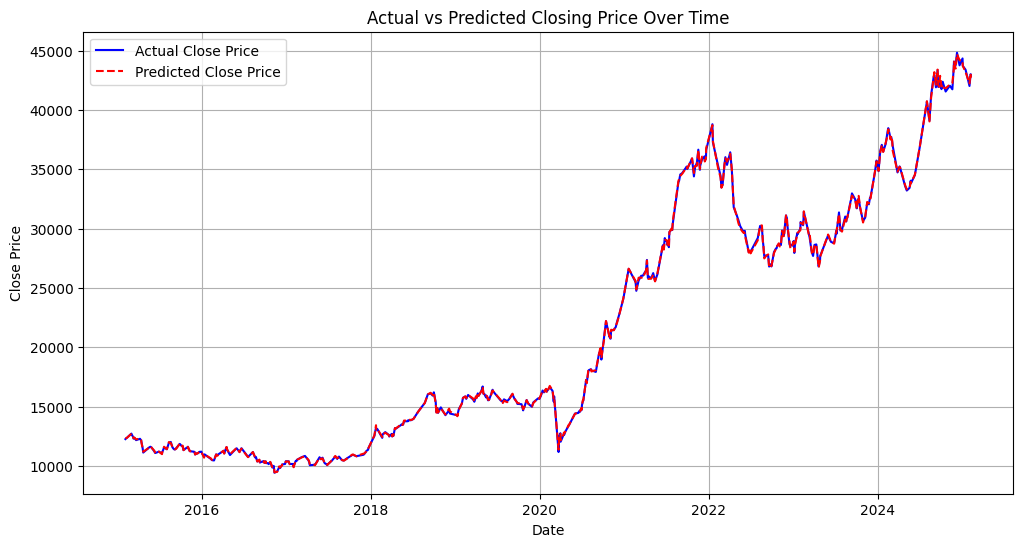

In [9]:
#............Preperation for Graph...........
date = pd.to_datetime(X_test[["year", "month", "day"]])
df_pred = pd.DataFrame({"date": date, "predicted_close": predictions}).sort_values(by="date")
df_test = pd.DataFrame({"date": date, "close": y_test}).sort_values(by="date")

# ...........Graph................
plt.figure(figsize=(12, 6))
plt.plot(df_test["date"], df_test["close"], label="Actual Close Price", color="blue")
plt.plot(df_pred["date"], df_pred["predicted_close"], label="Predicted Close Price", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Closing Price Over Time")
plt.legend()
plt.grid()
plt.show()